<font size = 6><b> PFE </b></font>

Adds

--

<font size = 4><b> Imports</b></font>

--

In [1]:
import os
import pandas 
import numpy as np

## We are studying two quantitative/performance properties: 
# elapsed time
# and size of the output 
# we have two distinct datasets for both

predDimension = "elapsedtime" # "size" # 
    
### It is simple/convenient to fix the "order" of dataset once and for all 
# (listing can be sensitive to eg an operating system)
### if you want you can use this method
#dataFolder="./datay4m" 
#listeAdresse = []
#adresseIni = os.listdir(dataFolder)
#for video in adresseIni: 
#    listeRep = os.listdir(dataFolder + "/" + video)
#    for rep in listeRep:
#        listeAdresse.append(dataFolder + "/" + video + "/" + rep)

# dataFolder="./datacalda" 
# all processing using the same exact cluster on IGRIDA (calda) and video format (y4m)
# (experiments suggest that hardware or video format does influence execution time)

dataTimeFolder = './datacalda2/'
dataSizeFolder = './datay4m2/'

def mkDataTime(): 
    return [dataTimeFolder + 'x264-1908-bridgefar-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-1908-ice-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-1908-flower-wasm/x264-results1.csv',
# './datacalda/x264-0408-tos3k-wasm/x264-results1.csv', # can't retrieve the original video
 dataTimeFolder + 'x264-1908-caire-wasm/x264-results1.csv',
# './datacalda/x264-0308-sintel-wasm/x264-results1.csv', # same as calda for time
 dataTimeFolder + 'x264-0208-sintel-calda-wasm/x264-results1.csv', # representative video, right? 
 dataTimeFolder + 'x264-1908-footballcif-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-0308-crowd_run-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-0608-blue-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-0608-people-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-1908-sunflowers-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-0408-deadline-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-2108-bridgeclose-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-1908-husky-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-1908-tennis-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-1908-riverbed-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-0608-park-wasm/x264-results1.csv',
 dataTimeFolder + 'x264-0508-soccer-wasm/x264-results1.csv']

# dataFolder="./datay4m"
# all processing using the same video format (y4m) 
# (experiments confirm that hardware/cluster does not change anything about the size)
def mkDataSize(): 
    return [dataSizeFolder + 'x264-1908-akiyo-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-bridgefar-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-football15-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-0608-tractor-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-ice-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-students-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-flower-wasm/x264-results1.csv',
# './datay4m/x264-0408-tos3k-wasm/x264-results1.csv', # can't retrieve the original video
 dataSizeFolder + 'x264-1908-caire-wasm/x264-results1.csv',
# './datay4m/x264-0308-sintel-wasm/x264-results1.csv', # same as calda for size
 dataSizeFolder + 'x264-0208-sintel-calda-wasm/x264-results1.csv', # representative video, right? 
 dataSizeFolder + 'x264-0308-ducks-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-footballcif-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-0308-crowd_run-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-0608-blue-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-0608-people-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-sunflowers-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-2108-netflix-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-0408-deadline-wasm/x264-results1.csv',
# './datay4m/x264-0208-crowd_run-bermuda-wasm/x264-results1.csv', # same as crowd above
 dataSizeFolder + 'x264-2108-bridgeclose-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-husky-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-waterfall-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-0308-mobilesif-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-1908-tennis-wasm/x264-results1.csv',
 # './datay4m/x264-0408-football-wasm/x264-results1.csv', # same as football15
 dataSizeFolder + 'x264-1908-riverbed-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-0608-park-wasm/x264-results1.csv',
 dataSizeFolder + 'x264-0508-soccer-wasm/x264-results1.csv']
 
# the key idea is to have in the *same order* video (for the size dataset or the time dataset)
# ie each "common" video will have the same "identifier"
def mkData(): 
    
    sizeAlignment = [x.replace(dataSizeFolder, '') for x in mkDataSize()]
    timeAlignment = [x.replace(dataTimeFolder, '') for x in mkDataTime()]
    common = []
    for s in sizeAlignment: 
        if s in timeAlignment:
            common.append(s)    
            
    common = np.sort(common)

    specificSize = []
    for s in sizeAlignment: 
        if s not in timeAlignment:
            specificSize.append(s)

    specificSize = np.sort(specificSize)
            
    # unnecessary 
    specificTime = []
    for t in timeAlignment: 
        if t not in sizeAlignment:
            specificTime.append(t)

    # time datas are subsets of size datas
    assert(len(specificSize) + len(common) == len(sizeAlignment))
    assert (len(specificTime) == 0)
    
    if predDimension == "size":     # mkDataSize()
        return list(map(lambda s: dataSizeFolder + s, np.append(common, specificSize)))
    elif predDimension == "elapsedtime":     #mkDataTime() 
        return list(map(lambda s: dataTimeFolder + s, np.append(common, specificTime)))
    else: 
        print("Error (pred dimension unknown)")

listeAdresse = mkData() # mkDataTime() #
if predDimension == "size":
    assert(len(listeAdresse) == len(mkDataSize()))
elif predDimension == "elapsedtime":
    assert(len(listeAdresse) == len(mkDataTime()))
#print(np.sort(mkDataSize()))
#print(np.sort(mkDataTime()))

#print(np.intersect1d(mkDataSize(), mkDataTime()))


        
# creation of the list of videos (for each video: x264 configurations + measurements)
listeVideo = []
for adresse in listeAdresse:
    listeVideo.append(pandas.read_csv(open(adresse,"r")))
# test
print("There are " + str(len(listeVideo)) + " videos")
assert (len(listeAdresse) == len(listeVideo))
listeAdresse
#vidEx = listeVideo[0][0:5]
#vidEx.drop(['usertime', 'systemtime'], axis=1)
#pd.DataFrame(listeVideo[2])#['elapsedtime']
#listeVideo[1]


There are 17 videos


['./datacalda2/x264-0208-sintel-calda-wasm/x264-results1.csv',
 './datacalda2/x264-0308-crowd_run-wasm/x264-results1.csv',
 './datacalda2/x264-0408-deadline-wasm/x264-results1.csv',
 './datacalda2/x264-0508-soccer-wasm/x264-results1.csv',
 './datacalda2/x264-0608-blue-wasm/x264-results1.csv',
 './datacalda2/x264-0608-park-wasm/x264-results1.csv',
 './datacalda2/x264-0608-people-wasm/x264-results1.csv',
 './datacalda2/x264-1908-bridgefar-wasm/x264-results1.csv',
 './datacalda2/x264-1908-caire-wasm/x264-results1.csv',
 './datacalda2/x264-1908-flower-wasm/x264-results1.csv',
 './datacalda2/x264-1908-footballcif-wasm/x264-results1.csv',
 './datacalda2/x264-1908-husky-wasm/x264-results1.csv',
 './datacalda2/x264-1908-ice-wasm/x264-results1.csv',
 './datacalda2/x264-1908-riverbed-wasm/x264-results1.csv',
 './datacalda2/x264-1908-sunflowers-wasm/x264-results1.csv',
 './datacalda2/x264-1908-tennis-wasm/x264-results1.csv',
 './datacalda2/x264-2108-bridgeclose-wasm/x264-results1.csv']

<font size = 4><b> Configurations sorting</b></font>

--

In [2]:
dico = {}
for i in listeVideo:
    for j in range(len(i)):
        if i["configurationID"][j] not in dico.keys():
            dico[i["configurationID"][j]]=i[predDimension][j]
        else : 
            dico[i["configurationID"][j]]=dico[i["configurationID"][j]]+i[predDimension][j]            
            

In [3]:
dico2 = {}
for i in listeVideo:
    for j in range(len(i)):
        if i["configurationID"][j] not in dico2.keys():
            dico2[i["configurationID"][j]]=[i[predDimension][j]]
        else : 
            dico2[i["configurationID"][j]].append(i[predDimension][j])
        

In [4]:
res = pandas.DataFrame.from_dict(dico, orient='index')
res.reset_index(inplace= True)
res.columns=['configid','sum']
res.sort_values("sum",inplace=True)
print(res[0:2])
print("...")
print(res[1150:1152])

     configid        sum
880       754  37.570505
715       605  37.588692
...
     configid        sum
372       297  94.651103
627       526  94.871240


We add all the time of all inputs, and calculate the sum of it by config before sorting.
We can see that the difference between the first and the last configurations (*2.5 in time)

In [5]:
res2 = pandas.DataFrame.from_dict(dico2, orient='index')
res2.sum(axis = 1)
res3 = res2.transpose()
res3.describe().transpose()[0:5]
# res3.describe().transpose().sort_values(by="mean")

,count,mean,std,min,25%,50%,75%,max
1,17.0,3.952804,4.050540,0.3954,0.7326,3.074800,5.010375,13.631667
10,17.0,5.169551,5.379713,0.5016,0.9908,4.299091,5.902625,17.598667
100,17.0,2.237163,2.113802,0.2342,0.4228,2.039800,2.765500,7.135333
1000,17.0,3.782660,3.796787,0.3250,0.6040,3.353800,4.699750,12.297000
1001,17.0,3.392039,3.278258,0.3256,0.6888,2.970800,4.329125,11.056000


<font size = 4><b> Correlations matrix about Kullback-Leiber divergence </b></font>

--

In [6]:
import scipy.stats as sc
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

taille = len(listeVideo)

divKLTaille = [[0 for x in range(taille)] for y in range(taille)]
divKLTaille2 = [[0 for x in range(taille)] for y in range(taille)]

for i in range(taille):
    for j in range(taille):
        divKLTaille[i][j] = sc.entropy(pk=listeVideo[i]['size'],
                                       qk=listeVideo[j]['size'])

indiceTaille = dendrogram(linkage(divKLTaille, 'ward'), no_plot=True)['leaves']

for i in range(taille):
    for j in range(taille):
        divKLTaille2[i][j] = sc.entropy(pk=listeVideo[indiceTaille[i]]['size'],
                                        qk=listeVideo[indiceTaille[j]]['size'])
        
plt.subplots(figsize=(10, 10))
plt.imshow(divKLTaille2,cmap='Reds',interpolation='nearest')
plt.title('div_KL of size')
plt.xticks(range(len(indiceTaille)),indiceTaille)
plt.yticks(range(len(indiceTaille)), indiceTaille)
plt.colorbar()
plt.show()

divKLTemps = [[0 for x in range(taille)] for y in range(taille)]
divKLTemps2 = [[0 for x in range(taille)] for y in range(taille)]

for i in range(taille):
    for j in range(taille):
        divKLTemps[i][j] = sc.entropy(pk=listeVideo[i][predDimension],
                                      qk=listeVideo[j][predDimension])
        
indiceTemps = dendrogram(linkage(divKLTemps, 'ward'), no_plot=True)['leaves']

for i in range(taille):
    for j in range(taille):
        divKLTemps2[i][j] = sc.entropy(pk=listeVideo[indiceTemps[i]][predDimension],
                                       qk=listeVideo[indiceTemps[j]][predDimension])

        
plt.subplots(figsize=(10, 10))
plt.imshow(divKLTemps2,cmap='Reds',interpolation='nearest')
plt.title('div_KL of time')
plt.xticks(range(len(indiceTemps)),indiceTemps)
plt.yticks(range(len(indiceTemps)), indiceTemps)
plt.colorbar()
plt.show()

<Figure size 1000x1000 with 2 Axes>

<Figure size 1000x1000 with 2 Axes>

We need one mean to compare all the clustering we have done. What differency them?

<font size = 4><b> General function for transfering video i on video j </b></font>

--

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC, SVR
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestRegressor

def transfer(var,varexp1,varexp2,i,j,testSize,method):
    # where var is either 'size' or 'elapsedtime'
    # varexp1 & varexp2 two parameter of configuration
    # i is the number of the "learning" video
    # j is the video which will benefits from the learning of i
    # testSize is the size of the test dataset (70 for 70% of tests)
    # method is 'sv' for support vector, 'rf' for random forest, 'reg' for regression

    st = testSize/100
    
    # Split the targets into training/testing sets
    x_train, x_test, y_train, y_test = train_test_split(listeVideo[i][[var, varexp1,varexp2]], 
                                                        listeVideo[j][var], 
                                                        test_size= st, 
                                                        random_state=0)
    
    #choose the method
    if method == 'reg':
        clf = linear_model.LinearRegression()
        
    if method == 'rf':
        clf = RandomForestRegressor(n_estimators=20)
        
    if method == 'sv':
        clf = SVC(kernel='rbf', C=1e10, gamma=1e-8)
      
    # Apply the model to the training datasets and predict for the testing dataset
    y_pred = clf.fit(x_train, y_train).predict(x_test)
    
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, y_pred))

    # Then we plot the prediction vs the reality
    plt.scatter(x_test['size'], y_test,  color='black')
    plt.scatter(x_test['size'], y_pred,  color='red')
    plt.xticks(())
    plt.yticks(())
    plt.show()

We test the function on tranfer with video 1 and video 5

svm
Variance score: 0.96


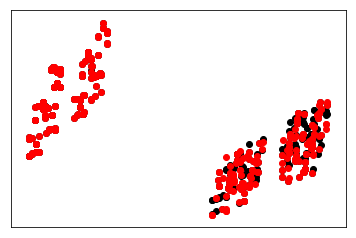

reg
Variance score: 0.79


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


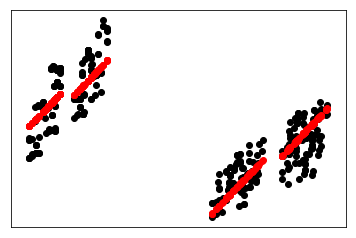

random forest
Variance score: 0.97


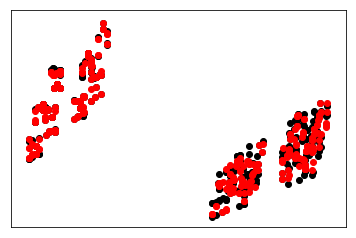

In [8]:
print("svm")
transfer('size','no_mbtree','no_cabac',1,6,30,'sv')
print("reg")
transfer('size','no_mbtree','no_cabac',1,6,30,'reg')
print("random forest")
transfer('size','no_mbtree','no_cabac',1,6,30,'rf')

<font size = 4><b> Group of configurations</b></font>

--

In [9]:
classement_general={}
for j in range(len(listeVideo)):
    classement = {}
    liste_temps=listeVideo[j][predDimension]
    for i in range(len(listeVideo[j][predDimension])):
        classement[listeVideo[j]["configurationID"][i]]=listeVideo[j][predDimension][i]
    classement=sorted(classement.items(), key=lambda t:t[1])
    classement_general[j]=classement
len(classement_general)

17

In [10]:
tableau={}
for c in range(1,len(listeVideo[0])+1):
    conf1={}
    for i in range(len(listeVideo)):
        classement_config=0
        for j in range(len(listeVideo[0])):
            if classement_general[i][j][0]==c:
                classement_config = classement_general[i].index(classement_general[i][j])
                
        conf1[i+1] = classement_config
    tableau[c]=conf1

<font size = 4><b> Dataframe of ordering configurations</b></font>

--

In [11]:
tableau2=pandas.DataFrame(data=tableau)
tableau_joli=tableau2.transpose()
tableau_joli
#se lit comme tel : la première configuration est la deuxième moins efficace pour la première vidéo

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,754,889,783,886,831,831,888,552,995,899,831,814,908,690,870,834,542
2,336,517,377,486,441,484,421,241,460,403,410,414,365,465,463,318,272
3,423,437,512,456,482,467,428,628,604,335,344,333,378,452,488,337,612
4,184,139,169,128,176,161,81,369,303,164,114,154,136,184,190,184,235
5,1114,1047,1124,1076,1116,1039,1142,1129,1123,949,1057,1057,1059,1106,1129,995,1130
6,238,312,217,269,255,234,254,109,240,310,243,316,198,228,195,238,209
7,729,886,651,876,844,860,838,544,480,730,713,748,767,719,836,771,522
8,802,628,844,678,688,575,713,957,927,660,810,779,728,862,734,640,949
9,835,845,896,816,879,797,921,832,889,598,621,637,752,660,905,579,833
10,1029,1093,1090,1088,1029,1090,1069,975,1087,1121,1103,1098,1121,1033,1049,1116,1046


In [12]:
groupe={}
for i in range(1,len(listeVideo)):
    groupe[i]=tableau_joli.loc[tableau_joli[i]<10].index
groupe 

{1: Int64Index([102, 207, 349, 490, 687, 753, 756, 781, 866, 966], dtype='int64'),
 2: Int64Index([102, 428, 529, 537, 574, 605, 608, 651, 921, 1019], dtype='int64'),
 3: Int64Index([57, 262, 349, 436, 908, 958, 1088, 1129, 1130, 1131], dtype='int64'),
 4: Int64Index([88, 340, 386, 428, 529, 537, 608, 651, 876, 996], dtype='int64'),
 5: Int64Index([88, 257, 386, 574, 580, 643, 651, 685, 692, 996], dtype='int64'),
 6: Int64Index([133, 156, 430, 866, 875, 918, 958, 1088, 1130, 1131], dtype='int64'),
 7: Int64Index([88, 257, 386, 449, 529, 574, 580, 605, 651, 876], dtype='int64'),
 8: Int64Index([163, 199, 238, 290, 654, 736, 822, 869, 960, 1099], dtype='int64'),
 9: Int64Index([224, 420, 507, 548, 720, 736, 782, 784, 822, 869], dtype='int64'),
 10: Int64Index([35, 133, 356, 424, 436, 490, 908, 958, 1129, 1131], dtype='int64'),
 11: Int64Index([35, 48, 349, 441, 580, 753, 781, 839, 918, 1129], dtype='int64'),
 12: Int64Index([80, 133, 356, 436, 866, 908, 918, 958, 1088, 1129], dtype='int6

<font size = 4><b> Top 10 configurations</b></font>

--

In [13]:
groupe_config={}
for i in (0,9):
    for j in range(1,len(listeVideo)):
        l=[]
        for c in range(0,10):
            for k in range(1,len(listeVideo)):
                if groupe[j][i]==groupe[k][c]:
                    if groupe[j][i] not in groupe_config.keys():
                        l.append(k)
                        groupe_config[groupe[j][i]]=l
                    else : 
                        groupe_config[groupe[j][i]].append(k)
for i in groupe_config:
    groupe_config[i]=set(groupe_config[i])
groupe_config

{102: {1, 2},
 57: {3},
 88: {4, 5, 7},
 133: {6, 10, 12},
 163: {8},
 224: {9},
 35: {10, 11, 13, 16},
 80: {12},
 207: {1, 13, 14},
 56: {15},
 966: {1},
 1019: {2, 13},
 1131: {3, 6, 10},
 996: {4, 5},
 876: {4, 7},
 1099: {8, 15},
 869: {8, 9},
 1129: {3, 10, 11, 12},
 1088: {3, 6, 12, 13, 16},
 973: {13, 14}}

Worst case rank diff (with at least one ranking in top 100) 1116
worst_config_rank dispersion (between 10% and 50%)903


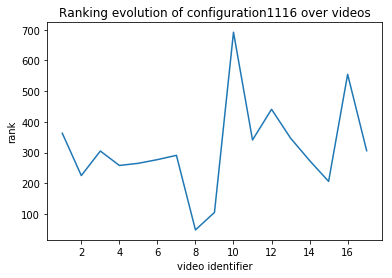

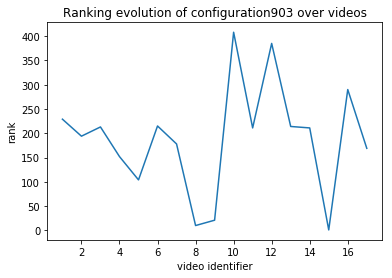

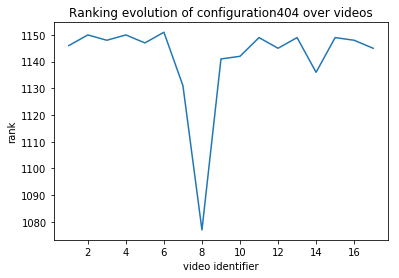

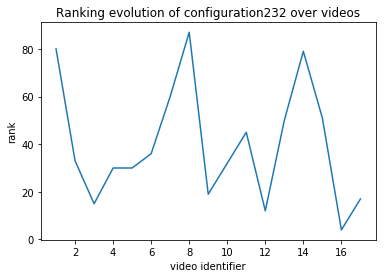

In [14]:
import pandas as pd
rank_configs = tableau_joli.transpose().describe(percentiles=[.1, .25, .5, .75, .9]).transpose().query('min < 50')
rank_maxmin_diff = pd.Series(rank_configs['max'] - rank_configs['min']).idxmax() # 1114
print("Worst case rank diff (with at least one ranking in top 100) " + str(rank_maxmin_diff))
# worstcase_rank_diff = tableau_joli.transpose()[worstcase_rank_maxmin_diff].values.argmax()
# tableau_joli.transpose()[worstcase_rank_diff].describe()
#tableau_joli.transpose()[1114].plot()
#plt.show()

#(rank_configs['mean']).argmax()
#tableau_joli.transpose()[404].describe()
#rank_configs['std'].sort_values()
#(rank_configs['25%'] - rank_configs['75%']).sort_values() #.describe()
#(rank_configs['10%'] - rank_configs['90%']).sort_values()
worst_config_rank = (rank_configs['10%'] - rank_configs['50%']).sort_values().index[0]
print("worst_config_rank dispersion (between 10% and 50%)" + str(worst_config_rank))
#(rank_configs['max'] - rank_configs['min']).sort_values()

def rank_evolution(cid):
    tableau_joli.transpose()[cid].plot()
    plt.xlabel('video identifier')
    plt.ylabel('rank')
    plt.title("Ranking evolution of configuration" + str(cid) + " over videos")
    plt.savefig("rankingevo-c" + str(cid) + ".pdf", format="pdf", bbox_inches='tight')
    plt.show()

# huge fluctuations (but on the overall)
rank_evolution(rank_maxmin_diff)

# huge fluctuations
rank_evolution(worst_config_rank)

# small fluctuations (eg always a worst configuration)
rank_evolution(tableau_joli.transpose().describe().transpose()['std'].idxmin())
#tableau_joli.transpose().describe().transpose().describe()

rank_evolution(tableau_joli.transpose().describe().transpose()['mean'].idxmin())

In [15]:
tableau_joli.transpose().describe().transpose().query('min == 0')['max'].argmax()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


1099

In [16]:
import scipy
tableau_joli.transpose()[224].argmax(), tableau_joli.transpose()[224].argmin()
tableau_joli.transpose()[224][6], tableau_joli.transpose()[224][13]
np.corrcoef(listeVideo[5][predDimension], listeVideo[13][predDimension])[0, 1], scipy.stats.spearmanr(listeVideo[5][predDimension], listeVideo[13][predDimension])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  


(0.9393662916640165,
 SpearmanrResult(correlation=0.9448141971055567, pvalue=0.0))

In [17]:
tableau_joli.transpose().describe().transpose().query('min < 10')['max'].argmax()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


420

In [18]:
tableau_joli.transpose()[44].argmax(), tableau_joli.transpose()[44].argmin()
tableau_joli.transpose()[44][6], tableau_joli.transpose()[44][1]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  """Entry point for launching an IPython kernel.


(257, 244)

In [19]:
tableau_joli.transpose().describe(percentiles=[.05]).transpose()['5%'].argmin()
# tableau_joli.transpose()[1088].describe() (good for top 25%)
# tableau_joli.transpose()[163].describe() # configuration 163 (top 10%)
# tableau_joli.transpose()[580].describe() # configuration 580 (top 5%)
# tableau_joli.transpose().describe().transpose()['mean'].argmin()
# tableau_joli.transpose()[839].describe()
# tableau_joli.transpose().describe().transpose()['std'].argmax()
#tableau_joli.transpose()[419].describe()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  """Entry point for launching an IPython kernel.


490

In [20]:
tableau_joli.transpose().describe().transpose().query('min == 0')['mean'].argmax()
#tableau_joli.transpose()[44].describe()
# tableau_joli.transpose()[163].describe()
tableau_joli.transpose()[224].describe()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


count     17.000000
mean     192.411765
std      122.480641
min        6.000000
25%      172.000000
50%      197.000000
75%      221.000000
max      518.000000
Name: 224, dtype: float64

In [21]:
# video 2 and video 5
import pandas as pd 
(tableau_joli[3] - tableau_joli[6]).describe() # 3 because we are staring from 1 (so video 2)
# tableau_joli[3].index[tableau_joli[3] == 0]
# tableau_joli[3].argmin()
#tableau_joli[3].index[tableau_joli[3] < 10]
tableau_joli[3][256] - tableau_joli[6][256] 
# tableau_joli[3].nlargest(10)
#(abs(tableau_joli[3] - tableau_joli[15])).describe() # good Spearman correlation 
# tableau_joli[15][tableau_joli[3].argmin()], tableau_joli[3][tableau_joli[15].argmin()]  
# tableau_joli[15][tableau_joli[3].index[tableau_joli[3] == 3]]

### eg top 10 configurations of video 2 vs video 14
### we start at 1, grrrr TODO
def diff_rank_top(v1ID, v2ID):
    rv1ID = v1ID + 1 # because we start at 1, grrrr TODO
    rv2ID = v2ID + 1 
    rankBy = tableau_joli.sort_values(by=rv1ID, axis=0)
    m = pd.concat([rankBy[rv1ID][:10], rankBy[rv2ID][:10]], axis=1)
    m.columns = ['video ' + str(v1ID), 'video ' + str(v2ID)]
    return m
diff_rank_top(2, 5)
#diff_rank_top(14, 2)

,video 2,video 5
349,0,55
1131,1,2
1130,2,5
1088,3,1
436,4,23
958,5,7
1129,6,28
908,7,14
57,8,22
262,9,16


In [22]:
tableau_joli.transpose().describe().transpose().sort_values(by="std")

,count,mean,std,min,25%,50%,75%,max
404,17.0,1141.411765,17.435807,1077.0,1142.0,1147.0,1149.0,1151.0
526,17.0,1138.117647,18.694526,1079.0,1137.0,1145.0,1151.0,1151.0
515,17.0,1136.352941,21.207137,1076.0,1138.0,1144.0,1148.0,1150.0
444,17.0,1122.705882,22.552064,1048.0,1119.0,1125.0,1134.0,1145.0
297,17.0,1136.235294,24.061196,1072.0,1141.0,1145.0,1149.0,1150.0
476,17.0,1089.058824,24.961146,1035.0,1067.0,1099.0,1103.0,1125.0
232,17.0,40.000000,24.974987,4.0,19.0,33.0,51.0,87.0
1048,17.0,1085.117647,25.859917,1010.0,1068.0,1095.0,1102.0,1110.0
281,17.0,1084.352941,25.995050,1039.0,1064.0,1089.0,1101.0,1125.0
219,17.0,51.117647,26.009331,1.0,33.0,49.0,68.0,98.0


In [23]:
ranking_general_size={}
for j in range(len(listeVideo)):
    ranking_size = {}
    # liste_size=listeVideo[j]["size"]
    for i in range(len(listeVideo[j]["size"])):
        ranking_size[listeVideo[j]["configurationID"][i]]=listeVideo[j]["size"][i]
    ranking_size=sorted(ranking_size.items(), key=lambda t:t[1])
    ranking_general_size[j]=ranking_size
len(ranking_general_size)

17

In [24]:
tableau_size={}
for c in range(1,len(listeVideo[0])+1):
    conf1_size={}
    for i in range(len(listeVideo)):
        classement_config_size=0
        for j in range(len(listeVideo[0])):
            if ranking_general_size[i][j][0]==c:
                classement_config_size = ranking_general_size[i].index(ranking_general_size[i][j])
                
        conf1_size[i+1] = classement_config_size
    tableau_size[c]=conf1_size

In [25]:
tableau3=pandas.DataFrame(data=tableau_size)
tableau_joli_size=tableau3.transpose()
tableau_joli_size

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,127,665,29,462,374,598,98,39,75,655,693,627,297,497,70,287,12
2,133,671,53,517,366,607,112,61,72,659,717,649,324,542,97,311,37
3,1117,505,1084,638,607,499,970,964,1135,526,502,508,1074,667,966,782,951
4,1106,472,1112,671,657,530,949,1100,1082,560,494,542,1010,676,1091,860,1120
5,1123,490,977,602,700,448,1108,985,1117,406,460,421,817,706,1045,638,900
6,227,782,161,842,725,805,147,361,84,780,818,859,559,389,252,817,257
7,148,716,127,494,599,646,162,94,184,687,690,637,307,495,135,300,77
8,1127,515,1070,663,707,470,1124,1043,1115,458,473,464,942,770,1082,708,981
9,1103,494,1031,597,612,491,980,929,1139,515,479,488,1022,626,926,735,869
10,350,883,374,874,943,825,401,205,401,923,875,820,634,844,491,780,284


In [26]:
def rank_size_evolution(cid):
    tableau_joli_size.transpose()[cid].plot()
    plt.xlabel('video identifier')
    plt.ylabel('rank')
    plt.title("Ranking evolution of configuration" + str(cid) + " over videos (size)")
    # plt.savefig("rankingevo-c" + str(cid) + ".pdf", format="pdf", bbox_inches='tight')
    plt.show()
    
rank_configs_size = tableau_joli_size.transpose().describe(percentiles=[.1, .25, .5, .75, .9]).transpose().query('min < 10')
(rank_configs_size['max'] - rank_configs_size['min']).argmax() # 1114
# tableau_joli_size.transpose()[1114].argmax(), tableau_joli_size.transpose()[1114].describe()


#(rank_configs['mean']).argmax()
#tableau_joli.transpose()[404].describe()
# rank_configs_size['std'].sort_values()
#(rank_configs['25%'] - rank_configs['75%']).sort_values() #.describe()
# (rank_configs_size['10%'] - rank_configs_size['90%']).sort_values()
# (rank_configs_size['10%'] - rank_configs_size['50%']).sort_values()
(rank_configs_size['10%'] - rank_configs_size['25%']).sort_values()
#(rank_configs['max'] - rank_configs['min']).sort_values()

#rank_size_evolution(655)
#rank_size_evolution(1110)
#rank_size_evolution(877)
#rank_size_evolution(7)
# rank_size_evolution(161)
# rank_size_evolution(1109)
# rank_size_evolution(569)
# rank_size_evolution(1036) # nice one based on (rank_configs_size['10%'] - rank_configs_size['25%']).sort_values()
# rank_size_evolution(tableau_joli_size.transpose().describe().transpose()['std'].argmin())
#tableau_joli_size.transpose().describe().transpose().describe()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  # Remove the CWD from sys.path while we load stuff.


981    -37.2
947    -37.2
849    -37.2
519    -30.4
757    -29.4
783    -29.4
761    -29.4
899    -26.4
954    -26.0
513    -23.8
654    -23.6
238    -23.6
395    -21.0
492    -21.0
426    -21.0
543    -20.6
724    -18.2
940    -15.2
840    -13.8
887    -13.8
906    -13.8
935    -13.8
1047   -13.4
736    -12.8
822    -12.8
152    -11.4
874    -11.4
31     -11.4
73     -11.4
658     -8.4
828     -8.4
810     -8.4
842     -8.4
621     -8.4
817     -8.4
873     -8.4
751     -8.4
750     -6.6
360     -6.0
632     -5.2
657     -5.0
626     -4.2
594     -4.2
427     -4.2
706     -4.2
455     -4.2
385     -4.2
241     -4.0
738     -4.0
588     -3.0
804     -3.0
752     -3.0
836     -3.0
860     -1.4
618     -1.2
807     -1.2
653     -1.2
245     -1.0
740     -1.0
dtype: float64

In [27]:
import seaborn as sns
from IPython.display import display, HTML

nvideos = len(listeVideo)
rankdiff = [[0 for x in range(nvideos)] for y in range(nvideos)]
pred_diff = [[0 for x in range(nvideos)] for y in range(nvideos)]
for vid in range(nvideos):
    rvid = pd.DataFrame(listeVideo[vid][predDimension]).rank()
    amin = rvid[predDimension].values.argmin()
    for i in range(nvideos):
        if (i != vid):
            rvidi = pd.DataFrame(listeVideo[i][predDimension]).rank()
            rankdiff[i][vid] = rvidi.loc[amin][predDimension]
            
            argbesti = listeVideo[i][predDimension].values.argmin()
            besti = listeVideo[i].loc[argbesti][predDimension]
            bestvid = listeVideo[i].loc[amin][predDimension]
            pred_diff[i][vid] = (1 - (besti/bestvid)) * 100
            # abs(bestvid - besti)




display(HTML(pd.DataFrame(rankdiff).style.set_caption("Best ranking difference").background_gradient(cmap=sns.light_palette("green", as_cmap=True), axis=0).highlight_max(axis=0).render()))
display(HTML(pd.DataFrame(pred_diff).style.set_caption("Impact of ranking changes (percentage increase)").background_gradient(cmap=sns.light_palette("green", as_cmap=True), axis=0).highlight_max(axis=0).render()))


#pd.DataFrame(pred_diff).style.set_caption("Impact of ranking changes (percentage increase)").background_gradient(cmap=sns.light_palette("green", as_cmap=True), axis=0).highlight_max(axis=0).to_latex()

#pd.DataFrame(rankdiff).plot.box()
#plt.show()



#pd.DataFrame(listeVideo[0]).sort_values(by=predDimension) #, listeVideo[1]
#pd.DataFrame(listeVideo[2]).sort_values(by=predDimension)[:100]#.loc[756]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,86,2,90,72,69,85,194,201,7,9,58,7,10,228,56,39
1,62.5,0,46,14,20,83,8,199,223,88,43,90,88,68,196,91,27
2,45,76,0,94,90,17,83,193,196,24,40.5,6,24,52,229,20,15
3,48,4,46,0,8,78,16,208,217,79,49,92,79,34,175,93,18
4,24,4,56,14.5,0,94,10,99,109,75,40,85,75,27,100,78,53
5,80,83,56,82,84,0,94,197,201,25,73,8,25,59,220,21.5,44
6,34,10,55,20,4,109,0,200,207,125,49,107,125,30,168,120,60
7,271,181,91,167.5,164,216,152,0,16,190.5,253,203,190.5,262.5,7,200,116
8,89,184,93.5,27.5,39,164,212,4,0,298,72.5,27.5,298,53.5,18,43.5,98
9,111,199,23,138,153,28,108,226,236.5,0,147.5,7.5,1,88.5,385,6,14


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,1.56976,0.0703701,1.674,1.28399,1.2638,1.55371,13.3707,13.7698,0.416632,0.465903,1.16679,0.416632,0.486417,14.7262,1.14655,0.923418
1,2.61343,0,2.31091,0.764965,1.00162,3.79606,0.641455,12.9545,14.2208,3.90296,2.2465,4.01406,3.90296,2.87773,12.7643,4.10718,1.9417
2,1.78873,2.44811,0,3.48333,3.09869,0.898316,2.73481,11.0294,11.2051,1.00947,1.58186,0.459501,1.00947,1.91809,14.3858,0.976563,0.782779
3,2.16152,0.0733168,2.09123,0,0.373604,3.33346,0.700235,8.87378,10.0268,3.58041,2.16152,4.12677,3.58041,1.80122,8.02999,4.17546,0.740411
4,0.974574,0.266108,1.70687,0.763955,0,2.76041,0.608643,4.84475,5.62642,2.13604,1.4484,2.36173,2.13604,1.02602,5.0108,2.19047,1.6519
5,2.72432,2.90125,1.86074,2.77617,2.92278,0,3.2318,13.2049,13.6602,1.05777,2.35546,0.527177,1.05777,1.93548,17.094,1.02645,1.48972
6,3.74024,0.46445,4.29066,1.08274,0.152399,7.31579,0,10.6561,10.75,7.778,4.15064,7.18449,7.778,3.49312,9.43523,7.6666,4.44222
7,21.7063,17.7025,14.6995,17.3024,17.226,19.397,16.7721,0,3.9061,18.3699,21.0863,18.96,18.3699,21.269,2.16205,18.733,15.5032
8,16.8456,21.2666,17.1193,12.3586,13.488,20.5836,22.7761,6.84551,0,26.0103,15.9432,12.3586,26.0103,14.9493,11.1993,14.0785,17.5941
9,14.4737,20.082,3.05398,16.1033,17.2727,3.66972,14.1509,21.4614,22.4432,0,16.8697,1.30152,0,12.612,30.8511,1.2301,2.43031


In [28]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def mean_relative_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# reusing prediction model of v1ID for v2ID
def reusePredictionModel(v1ID, v2ID):
    p1 = pd.DataFrame(listeVideo[v1ID]).copy()
    r1 = pd.DataFrame(p1.sort_values(by=predDimension)[predDimension]) # rank(method="min")
    #print(r1)
    p2 = pd.DataFrame(listeVideo[v2ID]).copy().sort_values(by=predDimension)
    #print(p2[predDimension][:5])
    #print(p2)
    # transfer rank     
    predictedValues = pd.DataFrame(columns=['predicted_' + predDimension, predDimension]) # [0 for x in range(len(p2))]

    #print(p2)
    ind = 0
    for i, r in r1.iterrows():
        nvalue = p2.iloc[ind][predDimension]
        #print (str(i) + " " + str(nvalue))
        predictedValues.loc[i] = [nvalue, p2.loc[i][predDimension]]
        ind = ind + 1
    # p2['predicted_' + predDimension] = predictedValues
    p2 = predictedValues.sort_values(by=predDimension)
    pdiff = pd.DataFrame(p2)
    pdiff['diff'] = pdiff[predDimension] - pdiff['predicted_' + predDimension]
    return p2, mean_relative_error(pdiff[predDimension], pdiff['predicted_' + predDimension])

    #for r in r1:
    #    print(r)

maeij = [[1.0 for x in range(len(listeVideo))] for y in range(len(listeVideo))]
for i in range(len(listeVideo)):
    for j in range(len(listeVideo)):
        if (i !=j):
            p, m = reusePredictionModel(i, j)
            maeij[i][j] = m

        
pd.DataFrame(maeij)


    
    

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.000000,6.126732,1.841275,3.905744,5.524166,4.943798,5.211908,12.317056,9.560401,9.443113,3.773827,5.780648,4.512758,5.761959,7.511708,7.229046,5.995221
1,4.483708,1.000000,4.219788,1.923972,2.505864,2.322357,4.479220,13.677992,9.928376,10.442587,6.571299,7.488671,7.001838,6.537692,3.602453,8.860909,7.168086
2,1.796691,5.331098,1.000000,3.056194,4.641939,4.283451,4.937397,11.635026,8.154334,9.741484,4.322787,5.777085,5.276543,4.551532,6.154321,7.494333,4.941171
3,3.568837,2.294500,2.925159,1.000000,2.828025,2.793125,4.458476,12.425271,9.023847,10.330761,5.665706,6.806806,5.934729,3.921770,3.834680,8.339867,6.045570
4,4.108967,3.194081,3.485767,2.346239,1.000000,4.668517,2.925271,11.846326,8.134891,11.902739,7.163267,8.704965,7.993133,5.784168,2.078522,9.687131,6.715337
5,3.924768,2.753159,3.683042,2.706152,4.278965,1.000000,5.799688,14.067871,10.636360,8.354946,5.328174,5.246291,5.302345,6.728561,6.209999,6.736573,6.322946
6,5.006002,5.653744,5.356116,5.159444,3.371445,6.790426,1.000000,14.050081,9.376375,12.238882,8.572410,9.796136,8.266891,10.673074,4.257198,10.174760,9.584435
7,10.653043,13.382691,10.106153,9.785302,10.827589,14.466100,12.056085,1.000000,7.363074,18.848262,13.545648,15.499672,16.345543,11.181262,10.255747,16.306817,6.839038
8,8.539073,10.255915,7.716589,7.718359,7.925957,11.152674,8.479351,8.046298,1.000000,16.379098,11.270836,12.721887,12.989628,10.270265,7.484465,13.879454,7.658894
9,9.423202,12.553161,11.243012,11.996428,13.156228,9.442413,11.732279,23.943899,19.323991,1.000000,9.239867,5.470324,7.309179,21.089784,16.628374,3.190482,14.527158


In [67]:
import pandas as pd
from sklearn import preprocessing

videoID = 8
df = pd.DataFrame(listeVideo[videoID][predDimension])
df

normalizer = preprocessing.Normalizer().fit(df)  # fit does nothing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(np_scaled, columns=[predDimension])
df.sort_values(by=predDimension)[:5], df_normalized.sort_values(by=predDimension)[:5]

X = []
for i in range(len(listeVideo)):
    X.append(listeVideo[i][predDimension])

norms = pd.DataFrame(preprocessing.normalize(X, norm='max')).transpose()
for i in range(len(listeVideo)):
    listeVideo[i][predDimension] = norms[i]

listeVideo[5]
#np.corrcoef(norms[0], norms[1])[0, 1], np.corrcoef(listeVideo[0][predDimension], listeVideo[1][predDimension])[0, 1]




,configurationID,H264,no_8x8dct,no_asm,no_cabac,no_deblock,no_fast_pskip,no_mbtree,no_mixed_refs,no_weightb,rc_lookahead,ref,size,usertime,systemtime,elapsedtime
0,1,True,True,False,False,True,True,False,True,True,20,9,14580447,64.8645,0.4290,0.719094
1,10,True,True,False,True,False,True,False,False,True,40,9,16245143,77.1640,0.5080,0.932402
2,100,True,True,False,False,True,False,True,True,False,40,1,8470682,37.3405,0.2970,0.396907
3,1000,True,True,False,True,False,True,True,True,False,40,9,9136214,62.1315,0.4235,0.674512
4,1001,True,False,False,False,True,False,False,True,False,60,5,16614803,53.3095,0.5360,0.658043
5,1002,True,False,False,True,False,True,False,False,False,60,5,17356184,59.8465,0.5165,0.772645
6,1003,True,False,False,False,True,False,False,True,False,60,1,17021341,44.7380,0.4560,0.542240
7,1004,True,False,False,True,False,True,False,False,False,60,1,17718070,45.4100,0.4635,0.554206
8,1005,True,True,False,False,True,True,False,False,True,60,1,15879470,42.1435,0.4245,0.513267
9,1006,True,True,False,False,True,True,False,False,True,60,9,15351974,77.4560,0.5325,0.943058
